In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from tqdm.auto import tqdm, trange

In [2]:
train_image_files = sorted(glob.glob('/kaggle/input/lfpw-labelled-face-parts-in-the-wild/trainset/*.png'))
train_info_files = sorted(glob.glob('/kaggle/input/lfpw-labelled-face-parts-in-the-wild/trainset/*.pts'))
test_image_files = sorted(glob.glob('/kaggle/input/lfpw-labelled-face-parts-in-the-wild/testset/*.png'))
test_info_files = sorted(glob.glob('/kaggle/input/lfpw-labelled-face-parts-in-the-wild/testset/*.pts'))

In [3]:
len(train_image_files), len(train_info_files)

(811, 811)

In [4]:
len(test_image_files), len(test_image_files)

(224, 224)

In [5]:
def read_pts_file(file_path):
    points = []
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        # Skip the first two lines (n_points and {)
        for line in lines[3:]:
            # Remove the closing brace if present
            line = line.strip().replace('}', '')
            if line:  # Avoid empty lines
                # Split the line into two float values
                x, y = map(float, line.split())
                points.append((x, y))
    
    # Convert the list of points to a NumPy array
    return np.array(points)

In [6]:
train_dict = {
    'path': []
}

for i in range(68):
    train_dict[f'point_{i}_x'] = []
    train_dict[f'point_{i}_y'] = []

for i, (info_file, image_file) in enumerate(zip(train_info_files, train_image_files)):
    points = read_pts_file(info_file)
    train_dict['path'].append(image_file)
    for j in range(68):
        x, y = points[j]
        train_dict[f'point_{j}_x'].append(x)
        train_dict[f'point_{j}_y'].append(y)

In [7]:
val_dict = {
    'path': []
}

for i in range(68):
    val_dict[f'point_{i}_x'] = []
    val_dict[f'point_{i}_y'] = []

for i, (info_file, image_file) in enumerate(zip(test_info_files, test_image_files)):
    points = read_pts_file(info_file)
    val_dict['path'].append(image_file)
    for j in range(68):
        x, y = points[j]
        val_dict[f'point_{j}_x'].append(x)
        val_dict[f'point_{j}_y'].append(y)

In [8]:
train_df = pd.DataFrame(train_dict)
val_df = pd.DataFrame(val_dict)

In [9]:
train_df.head()

path   point_0_x   point_0_y  \
0  /kaggle/input/lfpw-labelled-face-parts-in-the-...  115.167660  220.807529   
1  /kaggle/input/lfpw-labelled-face-parts-in-the-...   67.577102  165.827455   
2  /kaggle/input/lfpw-labelled-face-parts-in-the-...  105.234748  155.523419   
3  /kaggle/input/lfpw-labelled-face-parts-in-the-...  221.843528  292.659240   
4  /kaggle/input/lfpw-labelled-face-parts-in-the-...  244.682147  343.274427   

    point_1_x   point_1_y   point_2_x   point_2_y   point_3_x   point_3_y  \
0  116.164839  245.721357  120.208690  270.389841  126.818237  293.156059   
1   68.133929  187.330357   71.003827  206.845663   75.595663  224.639031   
2  105.904018  170.435587  109.538679  185.045049  113.703425  198.744680   
3  223.228762  323.233551  228.630287  356.567489  235.748786  386.733451   
4  250.858263  380.331122  259.504825  417.387817  269.386610  458.150181   

    point_4_x  ...  point_63_x  point_63_y  point_64_x  point_64_y  \
0  135.630967  ...  203.605936  327.453212  227.819411  327.220701   
1   80.187500  ...  142.573631  249.134186  150.332645  249.800009   
2  118.755326  ...  162.457822  222.453964  179.609637  220.607898   
3  244.524206  ...  336.896319  425.073534  359.223591  414.668060   
4  282.974065  ...  420.432418  477.544923  434.320653  479.273395   

   point_65_x  point_65_y  point_66_x  point_66_y  point_67_x  point_67_y  
0  203.605936  336.539751  193.356785  336.194279  183.164758  334.765621  
1  142.888306  253.304333  132.790217  254.297164  124.306693  252.988794  
2  162.457822  222.453964  154.608858  222.569839  148.767656  221.715033  
3  336.680834  414.025747  324.762583  414.975570  313.693172  414.602677  
4  421.403702  485.563532  407.088643  488.203212  393.911666  488.012834  

[5 rows x 137 columns]

In [10]:
points_left = [30, 37, 38, 43, 44, 48, 54]

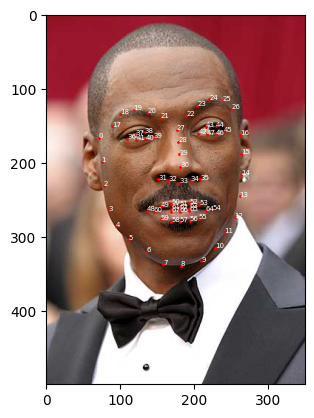

In [11]:
num = 123

img = cv2.imread(train_df.iloc[num]['path'])[:, :, ::-1]

for i in range(68):
    x = train_df.iloc[num][f'point_{i}_x']
    y = train_df.iloc[num][f'point_{i}_y']
    plt.text(x, y, i, fontsize=5, c='white')
    plt.scatter([x], [y], s=1, c='red')

plt.imshow(img)

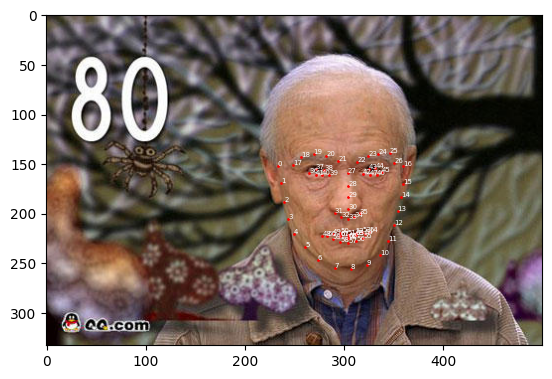

In [12]:
num = 133

img = cv2.imread(train_df.iloc[num]['path'])[:, :, ::-1]

for i in range(68):
    x = train_df.iloc[num][f'point_{i}_x']
    y = train_df.iloc[num][f'point_{i}_y']
    plt.text(x, y, i, fontsize=5, c='white')
    plt.scatter([x], [y], s=1, c='red')

plt.imshow(img)

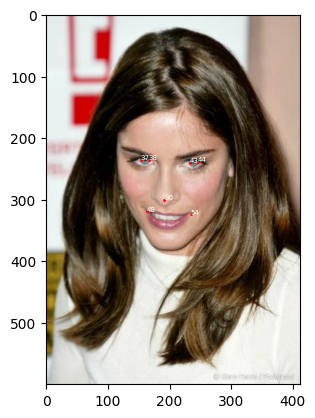

In [13]:
num = 0

img = cv2.imread(train_df.iloc[num]['path'])[:, :, ::-1]

for i in points_left:
    x = train_df.iloc[num][f'point_{i}_x']
    y = train_df.iloc[num][f'point_{i}_y']
    plt.text(x, y, i, fontsize=5, c='white')
    plt.scatter([x], [y], s=1, c='red')

plt.imshow(img)

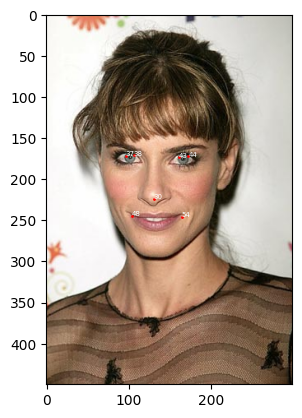

In [14]:
num = 1

img = cv2.imread(train_df.iloc[num]['path'])[:, :, ::-1]

for i in points_left:
    x = train_df.iloc[num][f'point_{i}_x']
    y = train_df.iloc[num][f'point_{i}_y']
    plt.text(x, y, i, fontsize=5, c='white')
    plt.scatter([x], [y], s=1, c='red')

plt.imshow(img)

In [15]:
train_df[['point_43_x', 'point_43_y', 'point_44_x', 'point_44_y']]

point_43_x  point_43_y  point_44_x  point_44_y
0    233.246081  239.604592  245.639459  238.315050
1    161.158855  173.178899  172.678680  172.051057
2    180.143572  152.159769  189.486735  151.784358
3    366.348795  301.853614  383.604217  301.853614
4    440.898215  327.395879  464.551870  323.510856
..          ...         ...         ...         ...
806  798.980743  242.708399  816.144264  239.942306
807  160.614999  182.278185  171.508720  180.814160
808  248.631037  187.071274  260.215716  187.600498
809  205.395310  161.618380  215.181317  157.589886
810  224.982437  205.705341  234.566497  204.540068

[811 rows x 4 columns]

In [16]:
(train_df['point_43_x'] + train_df['point_44_x']) / 2

0      239.442770
1      166.918768
2      184.815154
3      374.976506
4      452.725042
          ...    
806    807.562504
807    166.061860
808    254.423376
809    210.288314
810    229.774467
Length: 811, dtype: float64

In [17]:
[f'point_{i}_x' for point in points_left]

['point_54_x',
 'point_54_x',
 'point_54_x',
 'point_54_x',
 'point_54_x',
 'point_54_x',
 'point_54_x']

In [18]:
def filter_df(df):
    columns = [f'point_{point}_x' for point in points_left] + [f'point_{point}_y' for point in points_left]
    filtered_df = df[['path'] + columns]
#     print(filtered_df.columns)
    filtered_df['left_eye_center_x'] = (filtered_df['point_37_x'] + filtered_df['point_38_x']) / 2
    filtered_df['left_eye_center_y'] = (filtered_df['point_37_y'] + filtered_df['point_38_y']) / 2
    filtered_df['right_eye_center_x'] = (filtered_df['point_43_x'] + filtered_df['point_44_x']) / 2
    filtered_df['right_eye_center_y'] = (filtered_df['point_43_y'] + filtered_df['point_44_y']) / 2
    filtered_df = filtered_df.rename(columns={
        'point_48_x': 'left_mouth_x',
        'point_48_y': 'left_mouth_y',
        'point_54_x': 'right_mouth_x',
        'point_54_y': 'right_mouth_y',
        'point_30_x': 'nose_x',
        'point_30_y': 'nose_y'
    })
    filtered_df = filtered_df.drop(['point_37_x', 'point_37_y', 'point_38_x', 'point_38_y',
                                   'point_43_x', 'point_43_y', 'point_44_x', 'point_44_y'], axis=1)
    filtered_df = filtered_df.drop(['left_mouth_x', 'left_mouth_y',
                                   'right_mouth_x', 'right_mouth_y',
                                   'nose_x', 'nose_y'], axis=1)
    return filtered_df

In [19]:
# filtered_train_df = train_df[['path'] + [f'point_{i}_x' for point in points_left] + [f'point_{i}_y' for point in points_left]]
# filtered_train_df = 

In [20]:
filtered_train_df = filter_df(train_df)
filtered_train_df.head()

/tmp/ipykernel_30/352833725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['left_eye_center_x'] = (filtered_df['point_37_x'] + filtered_df['point_38_x']) / 2
/tmp/ipykernel_30/352833725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['left_eye_center_y'] = (filtered_df['point_37_y'] + filtered_df['point_38_y']) / 2
/tmp/ipykernel_30/352833725.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

path  left_eye_center_x  \
0  /kaggle/input/lfpw-labelled-face-parts-in-the-...         159.379434   
1  /kaggle/input/lfpw-labelled-face-parts-in-the-...         101.193401   
2  /kaggle/input/lfpw-labelled-face-parts-in-the-...         128.757846   
3  /kaggle/input/lfpw-labelled-face-parts-in-the-...         274.257381   
4  /kaggle/input/lfpw-labelled-face-parts-in-the-...         326.650196   

   left_eye_center_y  right_eye_center_x  right_eye_center_y  
0         234.779676          239.442770          238.959821  
1         170.833225          166.918768          172.614978  
2         150.967362          184.815154          151.972063  
3         303.220105          374.976506          301.853614  
4         336.744667          452.725042          325.453368

In [21]:
filtered_val_df = filter_df(val_df)
filtered_val_df.head()

/tmp/ipykernel_30/352833725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['left_eye_center_x'] = (filtered_df['point_37_x'] + filtered_df['point_38_x']) / 2
/tmp/ipykernel_30/352833725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['left_eye_center_y'] = (filtered_df['point_37_y'] + filtered_df['point_38_y']) / 2
/tmp/ipykernel_30/352833725.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

path  left_eye_center_x  \
0  /kaggle/input/lfpw-labelled-face-parts-in-the-...         257.453219   
1  /kaggle/input/lfpw-labelled-face-parts-in-the-...         284.578845   
2  /kaggle/input/lfpw-labelled-face-parts-in-the-...         210.340221   
3  /kaggle/input/lfpw-labelled-face-parts-in-the-...         202.813733   
4  /kaggle/input/lfpw-labelled-face-parts-in-the-...         202.085553   

   left_eye_center_y  right_eye_center_x  right_eye_center_y  
0         302.457904          365.433236          299.837957  
1         217.367871          358.447791          229.209466  
2         241.589373          330.363442          240.387542  
3         213.523745          290.606600          211.128027  
4         160.680914          249.065271          162.508418

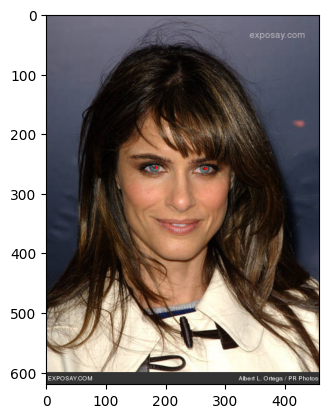

In [22]:
num = 10

img = cv2.imread(filtered_train_df.iloc[num]['path'])[:, :, ::-1]


plt.scatter([filtered_train_df.loc[num, 'left_eye_center_x'], filtered_train_df.loc[num, 'right_eye_center_x']], 
            [filtered_train_df.loc[num, 'left_eye_center_y'], filtered_train_df.loc[num, 'right_eye_center_y']], s=1, c='red')

plt.imshow(img)

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import Dataset, DataLoader
from torchvision.models import efficientnet_b2, EfficientNet_B2_Weights
import albumentations as A

/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [24]:
IMG_SIZE = 224
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [25]:
class LFPWDataset(Dataset):
    def __init__(self, df, mode, transform=None):
        super().__init__()
        self.df = df
        self.mode = mode
        self.transform = transform
        
    def __getitem__(self, idx):
        path = self.df.iloc[idx]['path']
        img = cv2.imread(path)[:, :, ::-1]
        keypoints = [(self.df.loc[idx, 'left_eye_center_x'], self.df.loc[idx, 'left_eye_center_y']),
                    (self.df.loc[idx, 'right_eye_center_x'], self.df.loc[idx, 'right_eye_center_y'])]
        if self.transform is not None:
            transformed = self.transform(image=img, keypoints=keypoints)
            
        img = torch.from_numpy(transformed['image']).permute(2, 0, 1)
        keypoints = transformed['keypoints']
        
        height, width = img.shape[1:]
        keypoints = torch.Tensor([(kp[0] / width, kp[1] / height) for kp in keypoints])
        
        return img, keypoints
    
    def __len__(self):
        return len(self.df)

In [33]:
train_transform = A.Compose([
    A.Resize(256, 256),
    A.RandomResizedCrop(224, 224),
    A.HorizontalFlip(p=0.5),
    A.Affine(scale=None, translate_percent=None, translate_px=None, rotate=[-30, 30], shear=None),
    A.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.0, p=0.5), 
    A.GaussianBlur(blur_limit=(3, 7), p=0.25),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
], keypoint_params=A.KeypointParams(format='xy', remove_invisible=False))

val_transform = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
], keypoint_params=A.KeypointParams(format='xy', remove_invisible=False))

train_dataset = LFPWDataset(filtered_train_df, 'train', train_transform)
val_dataset = LFPWDataset(filtered_val_df, 'val', val_transform)

In [27]:
# next(iter(train_dataset))

In [28]:
# next(iter(dataloader))[0].shape

In [29]:
# keypoints

torch.Size([36, 2, 2])


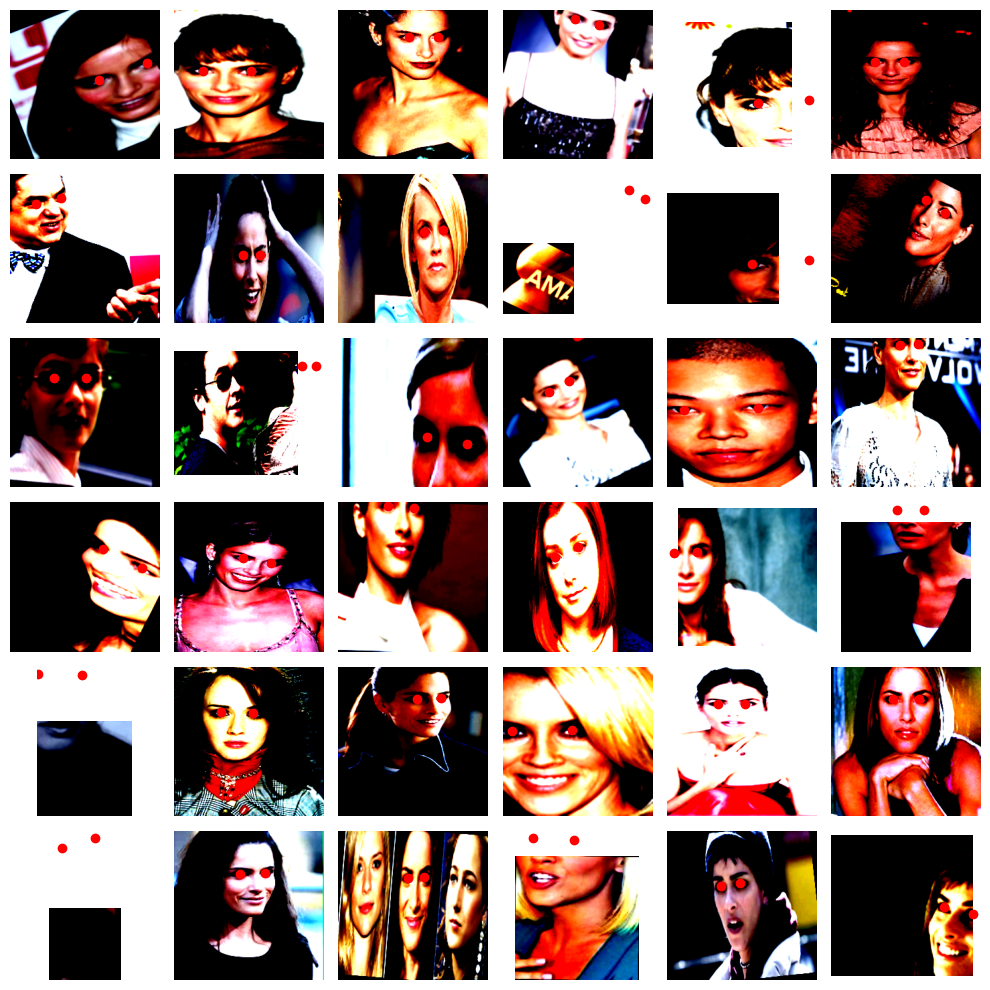

In [30]:
rows, cols = 6, 6
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
axes = axes.flatten()

torch.manual_seed(42)
dataloader = DataLoader(dataset=train_dataset, batch_size=rows*cols, shuffle=False)

images, keypoints = next(iter(dataloader))
print(keypoints.shape)
images = images.permute(0, 2, 3, 1)

for i in range(rows*cols):
    axes[i].imshow(images[i])
    left_eye_x = keypoints[i, 0, 0] * images.shape[2]
    left_eye_y = keypoints[i, 0, 1] * images.shape[2]
    right_eye_x = keypoints[i, 1, 0] * images.shape[2]
    right_eye_y = keypoints[i, 1, 1] * images.shape[2]
    x = [left_eye_x, right_eye_x] 
    y = [left_eye_y, right_eye_y]
    axes[i].scatter(x, y, c='red')
#     axes[i].set_title(labels[i], fontsize=8)
    axes[i].axis('off')
    
fig.tight_layout()

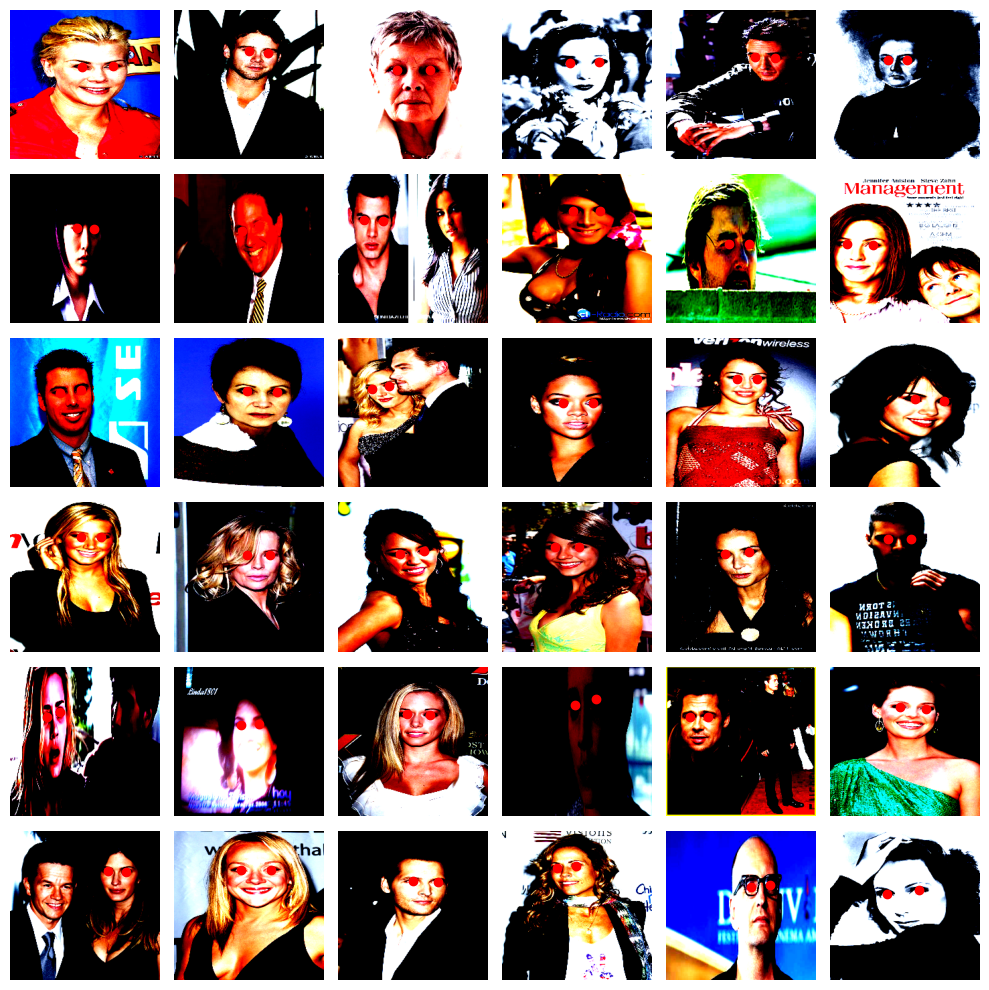

In [34]:
rows, cols = 6, 6
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
axes = axes.flatten()

torch.manual_seed(42)
dataloader = DataLoader(dataset=val_dataset, batch_size=rows*cols, shuffle=False)

images, keypoints = next(iter(dataloader))
images = images.permute(0, 2, 3, 1)

for i in range(rows*cols):
    axes[i].imshow(images[i])
    left_eye_x = keypoints[i, 0, 0] * images.shape[2]
    left_eye_y = keypoints[i, 0, 1] * images.shape[2]
    right_eye_x = keypoints[i, 1, 0] * images.shape[2]
    right_eye_y = keypoints[i, 1, 1] * images.shape[2]
    x = [left_eye_x, right_eye_x] 
    y = [left_eye_y, right_eye_y]
    axes[i].scatter(x, y, c='red')
#     axes[i].set_title(labels[i], fontsize=8)
    axes[i].axis('off')
    
fig.tight_layout()

In [35]:
class AdaptiveWingLoss(nn.Module):
    def __init__(self, omega=14, theta=0.5, epsilon=1, alpha=2.1):
        super(AdaptiveWingLoss, self).__init__()
        self.omega = omega
        self.theta = theta
        self.epsilon = epsilon
        self.alpha = alpha

    def forward(self, pred, target):
        '''
        :param pred: BxNxHxH
        :param target: BxNxHxH
        :return:
        '''

        y = target
        y_hat = pred
        delta_y = (y - y_hat).abs()
        delta_y1 = delta_y[delta_y < self.theta]
        delta_y2 = delta_y[delta_y >= self.theta]
        y1 = y[delta_y < self.theta]
        y2 = y[delta_y >= self.theta]
        loss1 = self.omega * torch.log(1 + torch.pow(delta_y1 / self.omega, self.alpha - y1))
        A = self.omega * (1 / (1 + torch.pow(self.theta / self.epsilon, self.alpha - y2))) * (self.alpha - y2) * (
            torch.pow(self.theta / self.epsilon, self.alpha - y2 - 1)) * (1 / self.epsilon)
        C = self.theta * A - self.omega * torch.log(1 + torch.pow(self.theta / self.epsilon, self.alpha - y2))
        loss2 = A * delta_y2 - C
        return (loss1.sum() + loss2.sum()) / (len(loss1) + len(loss2))

In [36]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

In [37]:
class MyModel(nn.Module):
    def __init__(self, num_keypoints=2, grad_from = 3, pretrained=True):
        super(MyModel, self).__init__()
        self.effnet = models.efficientnet_b2(weights=EfficientNet_B2_Weights.DEFAULT) 
        self.n_ouputs_last_layer = 1280*3*3

        for name, param in self.effnet.features.named_parameters():
            if int(name.split('.')[0]) < grad_from:
                param.requires_grad = False

        self.regressor = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(self.n_ouputs_last_layer, num_keypoints),
        )

    def forward(self, x):
        x = self.effnet.features(x)
        x = torch.flatten(x, 1)
        x = self.regressor(x)

        return x

In [40]:
# model = efficientnet_b2(weights=EfficientNet_B2_Weights.DEFAULT)
# model.features

In [53]:
model = efficientnet_b2(weights=EfficientNet_B2_Weights.DEFAULT)
in_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(in_features=in_features, out_features=4)
model = model.to(device)

In [54]:
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

In [63]:
def plot_results(history, name):
    fig, (loss_ax) = plt.subplots(1, 1, figsize=(12, 8))
    
    loss_ax.plot(history['train_loss'], label='train loss', marker='s', color='blue')
    loss_ax.plot(history['val_loss'], label='val loss', marker='s', color='red')
    loss_ax.legend()
    loss_ax.set_xlabel('epochs')
    loss_ax.set_ylabel('loss')
    loss_ax.set_title('Training vs validation loss')
    loss_ax.set_xticks(range(len(history['train_loss'])))
    loss_ax.set_xticks(ticks=range(len(history['train_loss'])), labels=range(1, len(history['train_loss']) + 1))
    
    fig.tight_layout()
    fig.suptitle(f'Comparison of loss {name}', y=1.05)

In [55]:
def update_history(history, train_loss, val_loss):
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)

In [56]:
def fit_epoch(model, train_loader, criterion, optimizer, current_epoch, 
              num_epochs, scheduler=None):
    model.train()
    running_loss = 0
    num_processed = 0
    
    pbar = tqdm(train_loader, desc=f'Train epoch: [{current_epoch+1}/{num_epochs}]', total=len(train_loader))

    for images, keypoints in pbar:
        images, keypoints = images.to(device), keypoints.to(device)
        
        keypoints = keypoints.reshape(-1, 4)
        
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, keypoints)
        
        loss.backward()
        optimizer.step()     
        
        with torch.no_grad():
            running_loss += loss.item() * len(images)
            num_processed += len(images)

        pbar.set_postfix(batch_loss=loss.item())
        
    train_loss = running_loss / num_processed
    
    return train_loss

In [57]:
def eval_epoch(model, val_loader, criterion, current_epoch, num_epochs):
    model.eval()
    running_loss = 0
    num_processed = 0
    
    pbar = tqdm(val_loader, desc=f'Val epoch: [{current_epoch+1}/{num_epochs}]', total=len(val_loader))
    
    for images, keypoints in pbar:
        images, keypoints = images.to(device), keypoints.to(device)
        
        keypoints = keypoints.reshape(-1, 4)
        
        with torch.no_grad():
            output = model(images)
            loss = criterion(output, keypoints)

            running_loss += loss.item() * len(images)
            
            num_processed += len(images)
        
        pbar.set_postfix(batch_loss=loss.item())
        
        
    #######################3
        
    batch = next(iter(val_loader))
    
    num_images = 8
    
    batch_images = batch[0][:num_images].to(device)
    batch_keypoints = batch[1][:num_images]
    
    with torch.no_grad():
        output = model(batch_images)
    
    fig, axes = plt.subplots(1, num_images, figsize=(12, 4))
    
    for i in range(num_images):
        axes[i].imshow(batch_images[i].detach().cpu().permute(1, 2, 0))
        left_eye_x = batch_keypoints[i, 0, 0] * batch_images.shape[2]
        left_eye_y = batch_keypoints[i, 0, 1] * batch_images.shape[2]
        right_eye_x = batch_keypoints[i, 1, 0] * batch_images.shape[2]
        right_eye_y = batch_keypoints[i, 1, 1] * batch_images.shape[2]
        
        x = [left_eye_x, right_eye_x] 
        y = [left_eye_y, right_eye_y]
        
        axes[i].scatter(x, y, c='green', s=5)
        
        pred_left_eye_x = output[i, 0].item() * batch_images.shape[2]
        pred_left_eye_y = output[i, 1].item() * batch_images.shape[2]
        pred_right_eye_x = output[i, 2].item() * batch_images.shape[2]
        pred_right_eye_y = output[i, 3].item() * batch_images.shape[2]
        
        x_pred = [pred_left_eye_x, pred_right_eye_x] 
        y_pred = [pred_left_eye_y, pred_right_eye_y]
        
        axes[i].scatter(x_pred, y_pred, c='red', s=5)
    
    fig.savefig(f'preds epoch: {current_epoch+1}.png')
    
    plt.show()
    
    val_loss = running_loss / num_processed
    
    return val_loss

In [58]:
def train(model, train_loader, val_loader, criterion, optimizer, num_epochs, 
          scheduler=None, early_stopper = None, path = 'model.pt'):
    history = {
        'train_loss': [], 'val_loss': []
    }
    
    best_acc, best_loss, best_epoch = 0, float('inf'), 0
    for epoch in range(num_epochs):
        train_loss = fit_epoch(model, train_loader, criterion, optimizer, epoch, 
                                          num_epochs, scheduler)
        val_loss = eval_epoch(model, val_loader, criterion, epoch, num_epochs)
        
        print(f'Epoch: {epoch+1}, train loss = {train_loss:.4f}, val loss: {val_loss:.4f}, ',
             f'train RMSE: {np.sqrt(train_loss):.4f}, val RMSE: {np.sqrt(val_loss):.4f}')
            
        update_history(history, train_loss, val_loss)
            
        if scheduler is not None:
            print(f'lr before step: {optimizer.param_groups[0]["lr"]:.6f}' , end='')
            scheduler.step(val_loss)
            print(f', lr after = {optimizer.param_groups[0]["lr"]:.6f}')
        
        if best_loss > val_loss:
            best_loss = val_loss
            best_epoch = epoch
            
            torch.save({
                'epoch': best_epoch+1,
                'loss': best_loss,
                'optimizer_state_dict': optimizer.state_dict(),
                'model_state_dict': model.state_dict()
            }, path)
            
            print(f'The model with the best val accuracy has been saved!')
        
        if early_stopper is not None:
            if early_stopper.early_stop(val_loss):
                print(f'Early stop on epoch = {epoch}, best loss = {best_loss:.4f}, best_epoch = {best_epoch+1}')
                break
                
    return history

In [59]:
NUM_EPOCHS = 50
criterion = nn.MSELoss()
# criterion = AdaptiveWingLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-3)
early_stopper = EarlyStopper(patience=7, min_delta=0.01)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.2, patience=4, min_lr=1e-5)

Train epoch: [1/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [1/50]:   0%|          | 0/7 [00:00<?, ?it/s]

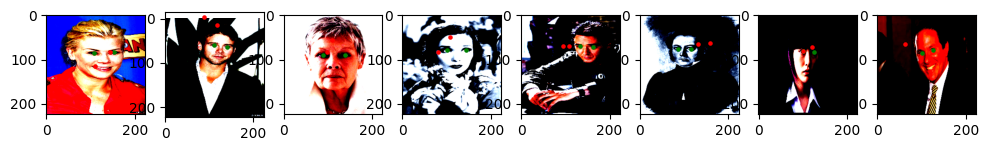

Epoch: 1, train loss = 0.1552, val loss: 0.0335,  train RMSE: 0.3940, val RMSE: 0.1831
lr before step: 0.001000, lr after = 0.001000
The model with the best val accuracy has been saved!


Train epoch: [2/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [2/50]:   0%|          | 0/7 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c1b2e6a5a20>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():
  File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: Exception ignored in: can only test a child process<function _MultiProcessingDataLoaderIter.__del__ at 0x7c1b2e6a5a20>

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():
  File "/op

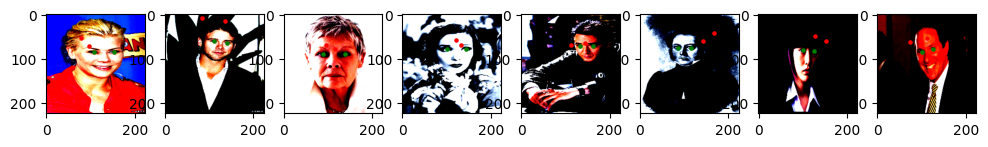

Epoch: 2, train loss = 0.1099, val loss: 0.0258,  train RMSE: 0.3315, val RMSE: 0.1606
lr before step: 0.001000, lr after = 0.001000
The model with the best val accuracy has been saved!


Train epoch: [3/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [3/50]:   0%|          | 0/7 [00:00<?, ?it/s]

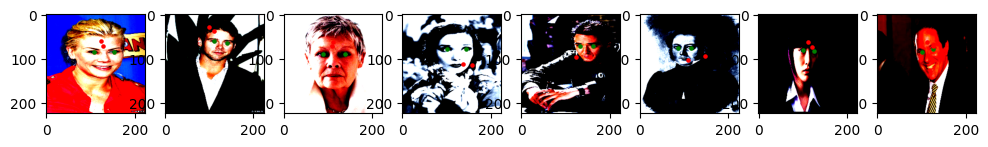

Epoch: 3, train loss = 0.0816, val loss: 0.0203,  train RMSE: 0.2857, val RMSE: 0.1423
lr before step: 0.001000, lr after = 0.001000
The model with the best val accuracy has been saved!


Train epoch: [4/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [4/50]:   0%|          | 0/7 [00:00<?, ?it/s]

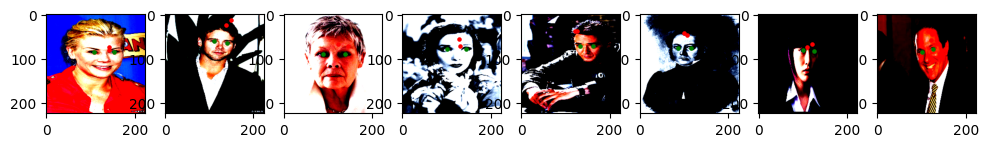

Epoch: 4, train loss = 0.0931, val loss: 0.0166,  train RMSE: 0.3052, val RMSE: 0.1288
lr before step: 0.001000, lr after = 0.001000
The model with the best val accuracy has been saved!


Train epoch: [5/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [5/50]:   0%|          | 0/7 [00:00<?, ?it/s]

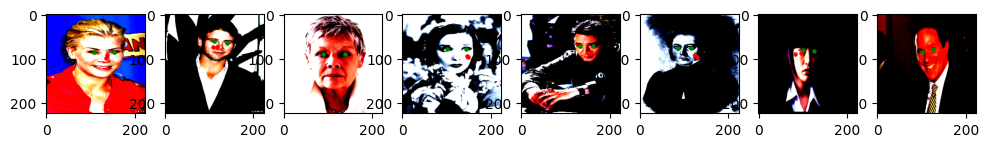

Epoch: 5, train loss = 0.0755, val loss: 0.0136,  train RMSE: 0.2747, val RMSE: 0.1164
lr before step: 0.001000, lr after = 0.001000
The model with the best val accuracy has been saved!


Train epoch: [6/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [6/50]:   0%|          | 0/7 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c1b2e6a5a20>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c1b2e6a5a20>
  File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
Traceback (most recent call last):
      File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
assert self._parent_pid == os.getpid(), 'can only test a child process'    self._shutdown_workers()

AssertionError  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():: 
can only test a child process  File "/opt

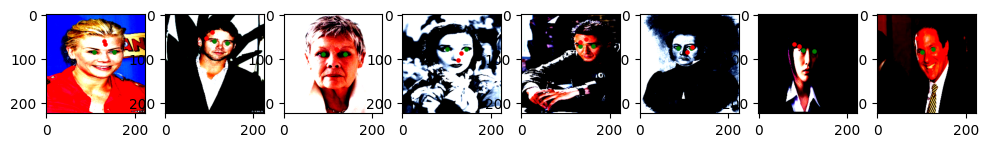

Epoch: 6, train loss = 0.0898, val loss: 0.0162,  train RMSE: 0.2996, val RMSE: 0.1271
lr before step: 0.001000, lr after = 0.001000


Train epoch: [7/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [7/50]:   0%|          | 0/7 [00:00<?, ?it/s]

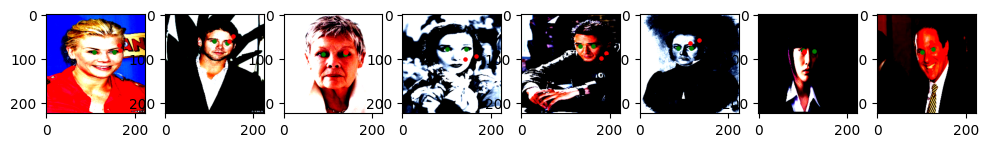

Epoch: 7, train loss = 0.0836, val loss: 0.0168,  train RMSE: 0.2891, val RMSE: 0.1298
lr before step: 0.001000, lr after = 0.001000


Train epoch: [8/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [8/50]:   0%|          | 0/7 [00:00<?, ?it/s]

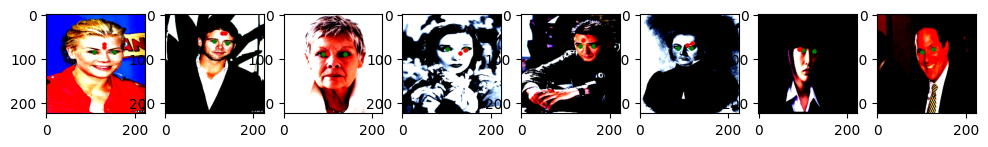

Epoch: 8, train loss = 0.0750, val loss: 0.0120,  train RMSE: 0.2739, val RMSE: 0.1095
lr before step: 0.001000, lr after = 0.001000
The model with the best val accuracy has been saved!


Train epoch: [9/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [9/50]:   0%|          | 0/7 [00:00<?, ?it/s]

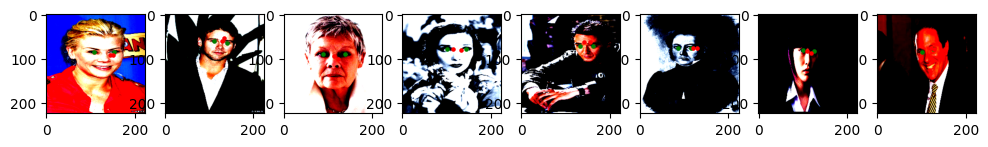

Epoch: 9, train loss = 0.0730, val loss: 0.0116,  train RMSE: 0.2702, val RMSE: 0.1076
lr before step: 0.001000, lr after = 0.001000
The model with the best val accuracy has been saved!


Train epoch: [10/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [10/50]:   0%|          | 0/7 [00:00<?, ?it/s]

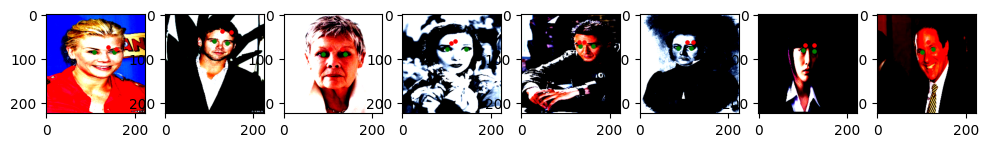

Epoch: 10, train loss = 0.0727, val loss: 0.0183,  train RMSE: 0.2695, val RMSE: 0.1352
lr before step: 0.001000, lr after = 0.001000


Train epoch: [11/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [11/50]:   0%|          | 0/7 [00:00<?, ?it/s]

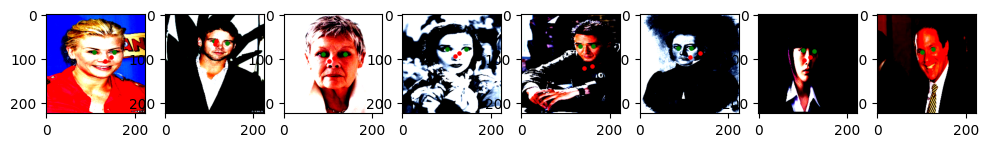

Epoch: 11, train loss = 0.0632, val loss: 0.0124,  train RMSE: 0.2514, val RMSE: 0.1112
lr before step: 0.001000, lr after = 0.001000


Train epoch: [12/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [12/50]:   0%|          | 0/7 [00:00<?, ?it/s]

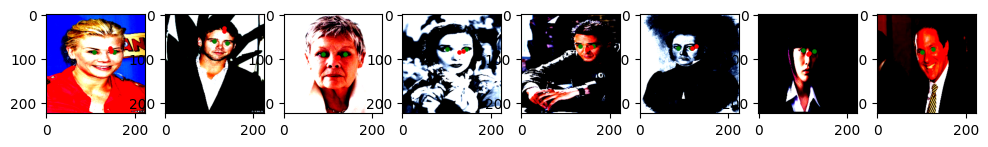

Epoch: 12, train loss = 0.0653, val loss: 0.0110,  train RMSE: 0.2556, val RMSE: 0.1048
lr before step: 0.001000, lr after = 0.001000
The model with the best val accuracy has been saved!


Train epoch: [13/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [13/50]:   0%|          | 0/7 [00:00<?, ?it/s]

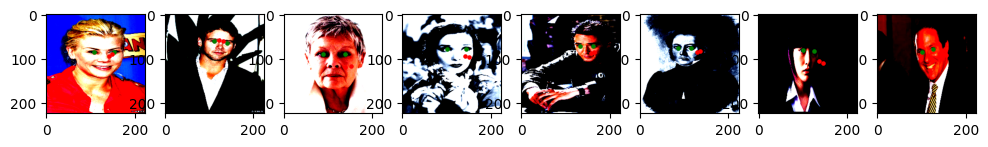

Epoch: 13, train loss = 0.0843, val loss: 0.0178,  train RMSE: 0.2903, val RMSE: 0.1332
lr before step: 0.001000, lr after = 0.001000


Train epoch: [14/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [14/50]:   0%|          | 0/7 [00:00<?, ?it/s]

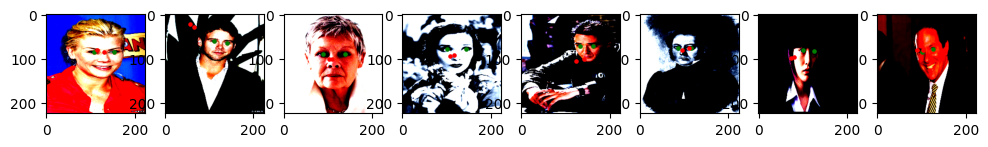

Epoch: 14, train loss = 0.0876, val loss: 0.0206,  train RMSE: 0.2960, val RMSE: 0.1434
lr before step: 0.001000, lr after = 0.001000


Train epoch: [15/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [15/50]:   0%|          | 0/7 [00:00<?, ?it/s]

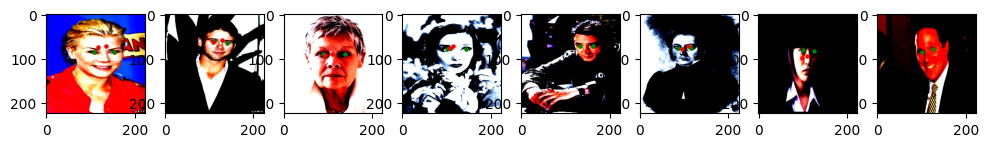

Epoch: 15, train loss = 0.0716, val loss: 0.0160,  train RMSE: 0.2676, val RMSE: 0.1266
lr before step: 0.001000, lr after = 0.001000


Train epoch: [16/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [16/50]:   0%|          | 0/7 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c1b2e6a5a20>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():
  File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c1b2e6a5a20>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
Exception ignored in: <function 

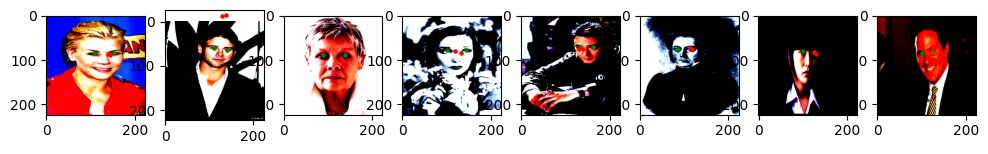

Epoch: 16, train loss = 0.0716, val loss: 0.0149,  train RMSE: 0.2675, val RMSE: 0.1222
lr before step: 0.001000, lr after = 0.001000


Train epoch: [17/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [17/50]:   0%|          | 0/7 [00:00<?, ?it/s]

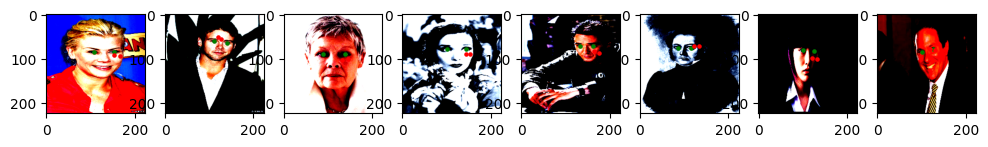

Epoch: 17, train loss = 0.0677, val loss: 0.0194,  train RMSE: 0.2601, val RMSE: 0.1392
lr before step: 0.001000, lr after = 0.000200


Train epoch: [18/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [18/50]:   0%|          | 0/7 [00:00<?, ?it/s]

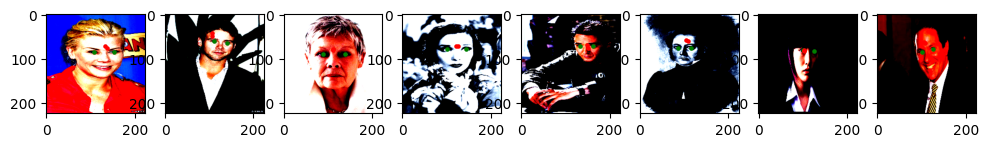

Epoch: 18, train loss = 0.0633, val loss: 0.0113,  train RMSE: 0.2517, val RMSE: 0.1062
lr before step: 0.000200, lr after = 0.000200


Train epoch: [19/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [19/50]:   0%|          | 0/7 [00:00<?, ?it/s]

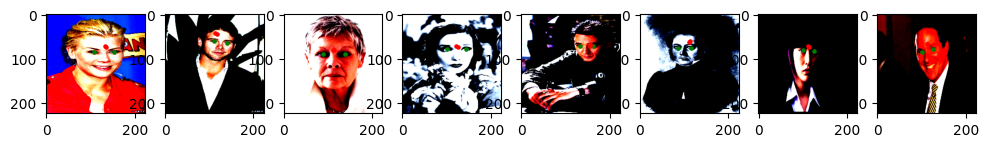

Epoch: 19, train loss = 0.0733, val loss: 0.0104,  train RMSE: 0.2707, val RMSE: 0.1020
lr before step: 0.000200, lr after = 0.000200
The model with the best val accuracy has been saved!


Train epoch: [20/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [20/50]:   0%|          | 0/7 [00:00<?, ?it/s]

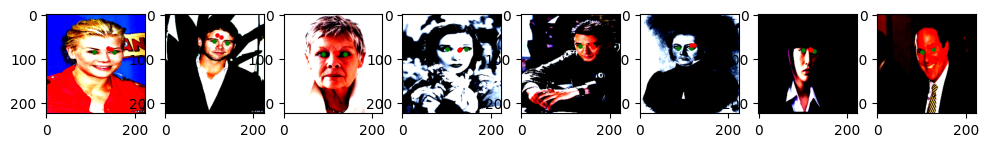

Epoch: 20, train loss = 0.0585, val loss: 0.0119,  train RMSE: 0.2418, val RMSE: 0.1089
lr before step: 0.000200, lr after = 0.000200


Train epoch: [21/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [21/50]:   0%|          | 0/7 [00:00<?, ?it/s]

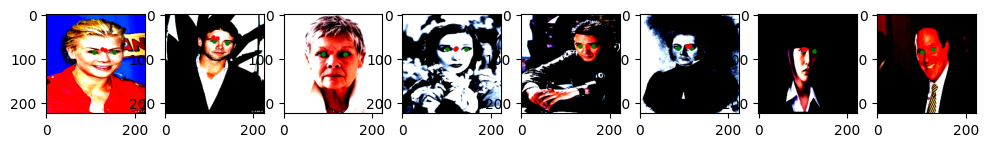

Epoch: 21, train loss = 0.0565, val loss: 0.0108,  train RMSE: 0.2376, val RMSE: 0.1039
lr before step: 0.000200, lr after = 0.000200


Train epoch: [22/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [22/50]:   0%|          | 0/7 [00:00<?, ?it/s]

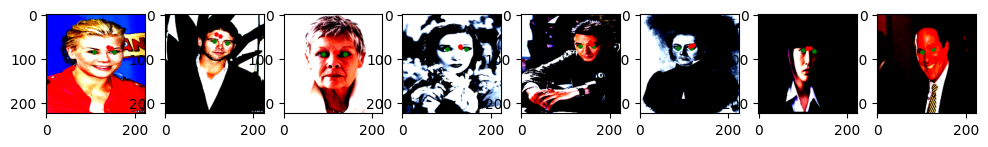

Epoch: 22, train loss = 0.0607, val loss: 0.0109,  train RMSE: 0.2464, val RMSE: 0.1043
lr before step: 0.000200, lr after = 0.000200


Train epoch: [23/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [23/50]:   0%|          | 0/7 [00:00<?, ?it/s]

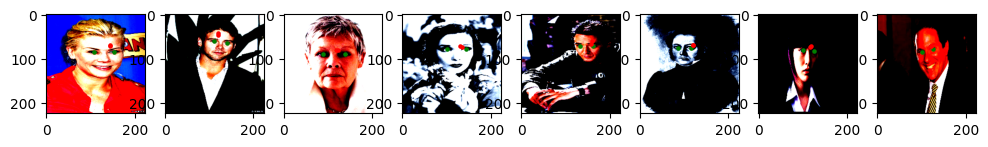

Epoch: 23, train loss = 0.0578, val loss: 0.0096,  train RMSE: 0.2405, val RMSE: 0.0982
lr before step: 0.000200, lr after = 0.000200
The model with the best val accuracy has been saved!


Train epoch: [24/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [24/50]:   0%|          | 0/7 [00:00<?, ?it/s]

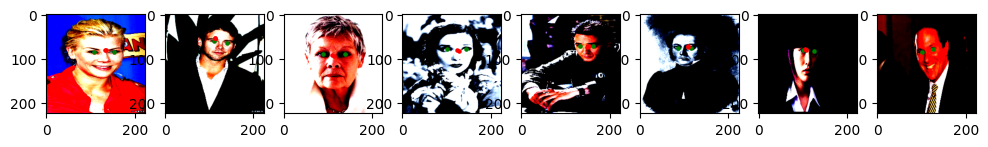

Epoch: 24, train loss = 0.0606, val loss: 0.0094,  train RMSE: 0.2462, val RMSE: 0.0971
lr before step: 0.000200, lr after = 0.000200
The model with the best val accuracy has been saved!


Train epoch: [25/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [25/50]:   0%|          | 0/7 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c1b2e6a5a20>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():
  File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c1b2e6a5a20>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():Exception ig

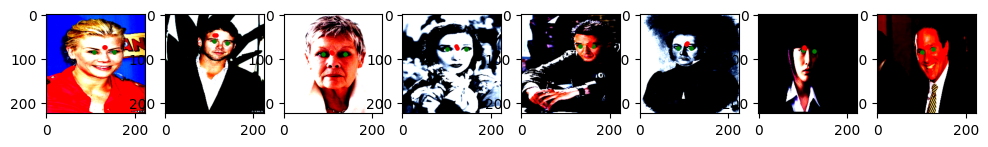

Epoch: 25, train loss = 0.0492, val loss: 0.0099,  train RMSE: 0.2218, val RMSE: 0.0995
lr before step: 0.000200, lr after = 0.000200


Train epoch: [26/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [26/50]:   0%|          | 0/7 [00:00<?, ?it/s]

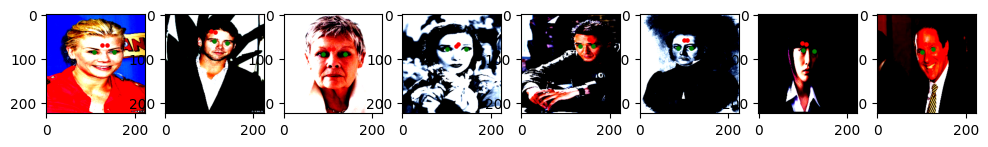

Epoch: 26, train loss = 0.0563, val loss: 0.0121,  train RMSE: 0.2373, val RMSE: 0.1100
lr before step: 0.000200, lr after = 0.000200


Train epoch: [27/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [27/50]:   0%|          | 0/7 [00:00<?, ?it/s]

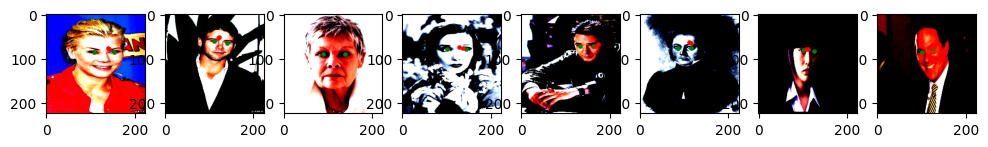

Epoch: 27, train loss = 0.0508, val loss: 0.0090,  train RMSE: 0.2253, val RMSE: 0.0947
lr before step: 0.000200, lr after = 0.000200
The model with the best val accuracy has been saved!


Train epoch: [28/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [28/50]:   0%|          | 0/7 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c1b2e6a5a20>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():
  File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c1b2e6a5a20><function _MultiProcessingDataLoaderIter.__del__ at 0x7c1b2e6a5a20>
Traceback (most recent call last):

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
  File "/opt/conda/lib/python3.10/site-packages/t

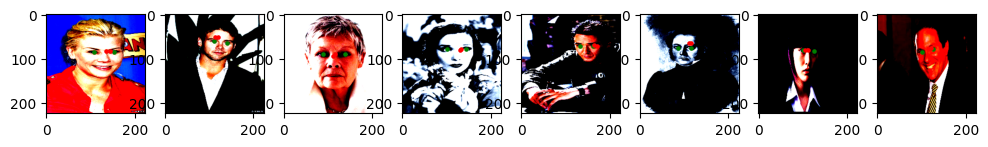

Epoch: 28, train loss = 0.0561, val loss: 0.0107,  train RMSE: 0.2369, val RMSE: 0.1036
lr before step: 0.000200, lr after = 0.000200


Train epoch: [29/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [29/50]:   0%|          | 0/7 [00:00<?, ?it/s]

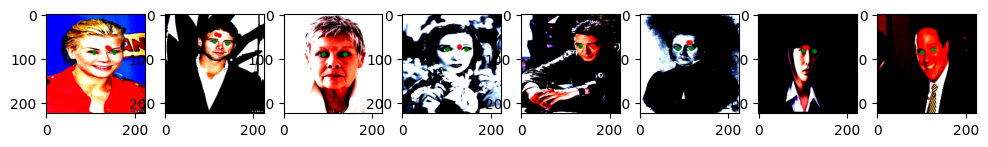

Epoch: 29, train loss = 0.0437, val loss: 0.0111,  train RMSE: 0.2091, val RMSE: 0.1051
lr before step: 0.000200, lr after = 0.000200


Train epoch: [30/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [30/50]:   0%|          | 0/7 [00:00<?, ?it/s]

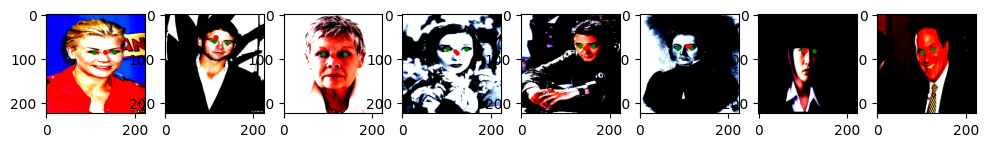

Epoch: 30, train loss = 0.0566, val loss: 0.0105,  train RMSE: 0.2380, val RMSE: 0.1026
lr before step: 0.000200, lr after = 0.000200


Train epoch: [31/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [31/50]:   0%|          | 0/7 [00:00<?, ?it/s]

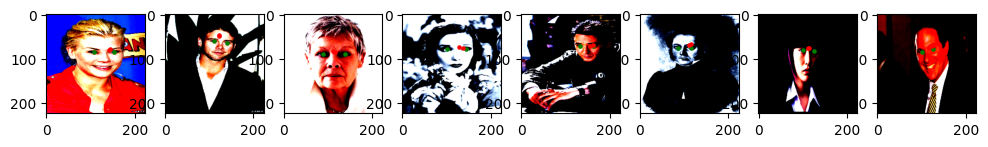

Epoch: 31, train loss = 0.0505, val loss: 0.0093,  train RMSE: 0.2247, val RMSE: 0.0963
lr before step: 0.000200, lr after = 0.000200


Train epoch: [32/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [32/50]:   0%|          | 0/7 [00:00<?, ?it/s]

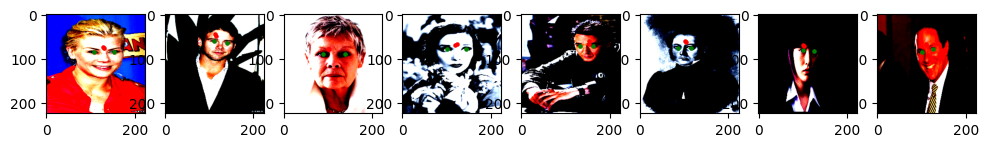

Epoch: 32, train loss = 0.0496, val loss: 0.0106,  train RMSE: 0.2226, val RMSE: 0.1029
lr before step: 0.000200, lr after = 0.000040


Train epoch: [33/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [33/50]:   0%|          | 0/7 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c1b2e6a5a20>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():
  File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c1b2e6a5a20>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
Exception ignored in:   File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
<function 

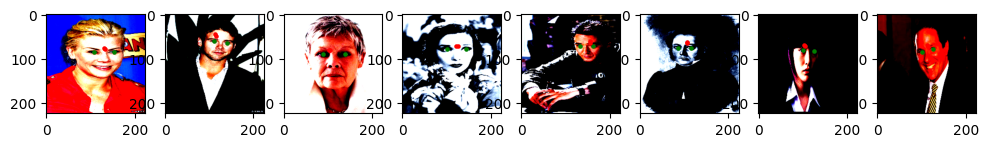

Epoch: 33, train loss = 0.0622, val loss: 0.0104,  train RMSE: 0.2493, val RMSE: 0.1018
lr before step: 0.000040, lr after = 0.000040


Train epoch: [34/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [34/50]:   0%|          | 0/7 [00:00<?, ?it/s]

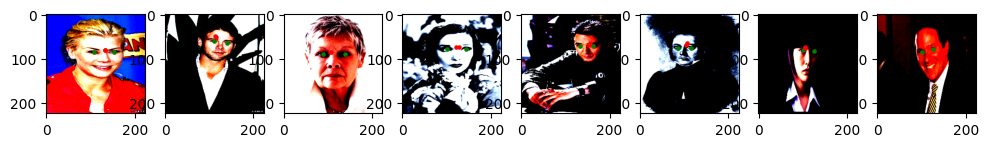

Epoch: 34, train loss = 0.0523, val loss: 0.0098,  train RMSE: 0.2287, val RMSE: 0.0991
lr before step: 0.000040, lr after = 0.000040


Train epoch: [35/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [35/50]:   0%|          | 0/7 [00:00<?, ?it/s]

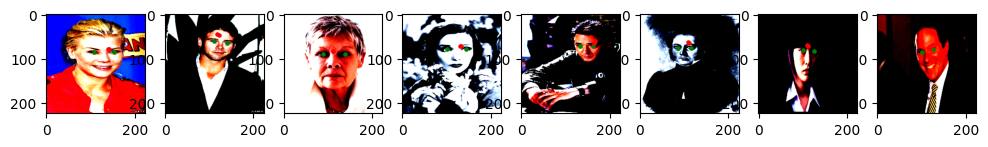

Epoch: 35, train loss = 0.0530, val loss: 0.0104,  train RMSE: 0.2303, val RMSE: 0.1022
lr before step: 0.000040, lr after = 0.000040


Train epoch: [36/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [36/50]:   0%|          | 0/7 [00:00<?, ?it/s]

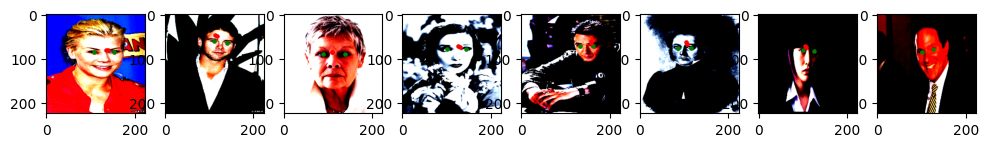

Epoch: 36, train loss = 0.0552, val loss: 0.0100,  train RMSE: 0.2350, val RMSE: 0.1000
lr before step: 0.000040, lr after = 0.000040


Train epoch: [37/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [37/50]:   0%|          | 0/7 [00:00<?, ?it/s]

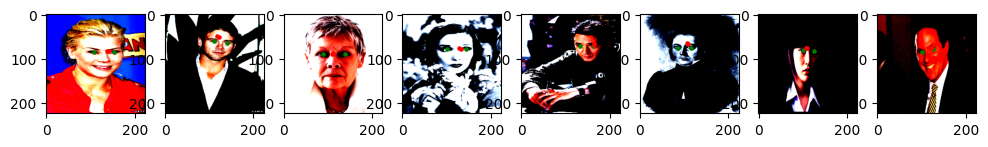

Epoch: 37, train loss = 0.0521, val loss: 0.0101,  train RMSE: 0.2283, val RMSE: 0.1003
lr before step: 0.000040, lr after = 0.000010


Train epoch: [38/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [38/50]:   0%|          | 0/7 [00:00<?, ?it/s]

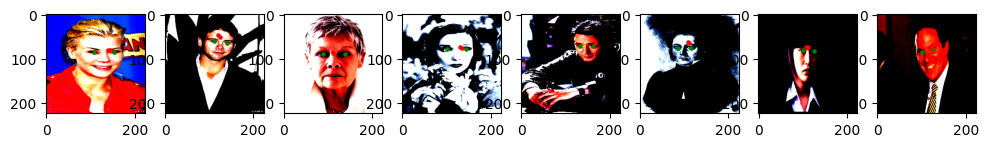

Epoch: 38, train loss = 0.0603, val loss: 0.0103,  train RMSE: 0.2455, val RMSE: 0.1014
lr before step: 0.000010, lr after = 0.000010


Train epoch: [39/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [39/50]:   0%|          | 0/7 [00:00<?, ?it/s]

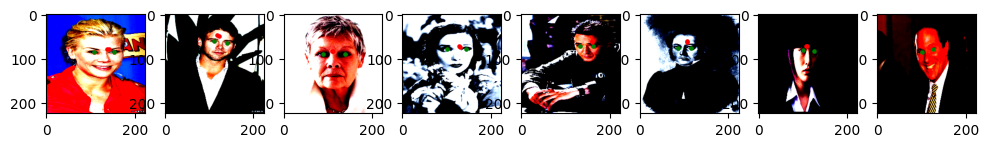

Epoch: 39, train loss = 0.0510, val loss: 0.0102,  train RMSE: 0.2258, val RMSE: 0.1011
lr before step: 0.000010, lr after = 0.000010


Train epoch: [40/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [40/50]:   0%|          | 0/7 [00:00<?, ?it/s]

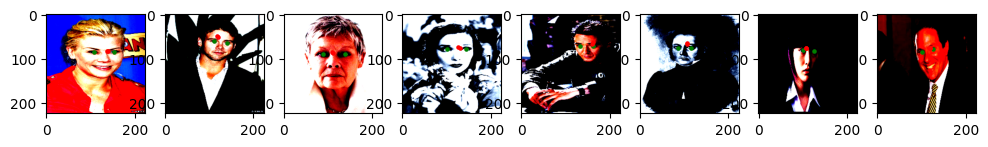

Epoch: 40, train loss = 0.0518, val loss: 0.0097,  train RMSE: 0.2277, val RMSE: 0.0985
lr before step: 0.000010, lr after = 0.000010


Train epoch: [41/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [41/50]:   0%|          | 0/7 [00:00<?, ?it/s]

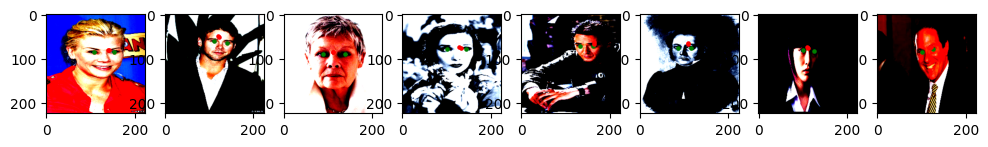

Epoch: 41, train loss = 0.0414, val loss: 0.0100,  train RMSE: 0.2036, val RMSE: 0.0998
lr before step: 0.000010, lr after = 0.000010


Train epoch: [42/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [42/50]:   0%|          | 0/7 [00:00<?, ?it/s]

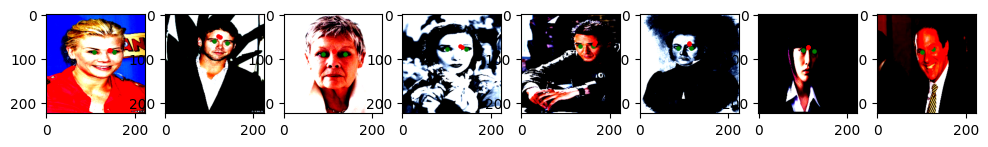

Epoch: 42, train loss = 0.0582, val loss: 0.0100,  train RMSE: 0.2412, val RMSE: 0.0999
lr before step: 0.000010, lr after = 0.000010


Train epoch: [43/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [43/50]:   0%|          | 0/7 [00:00<?, ?it/s]

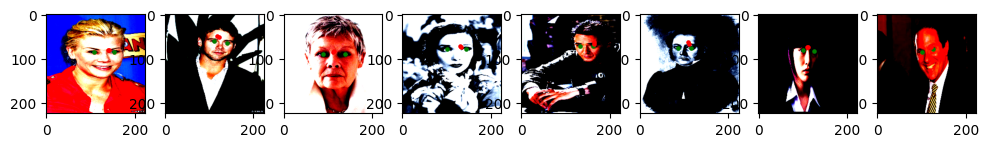

Epoch: 43, train loss = 0.0529, val loss: 0.0103,  train RMSE: 0.2300, val RMSE: 0.1014
lr before step: 0.000010, lr after = 0.000010


Train epoch: [44/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [44/50]:   0%|          | 0/7 [00:00<?, ?it/s]

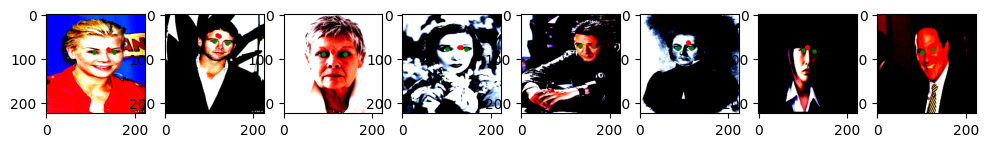

Epoch: 44, train loss = 0.0480, val loss: 0.0099,  train RMSE: 0.2191, val RMSE: 0.0997
lr before step: 0.000010, lr after = 0.000010


Train epoch: [45/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [45/50]:   0%|          | 0/7 [00:00<?, ?it/s]

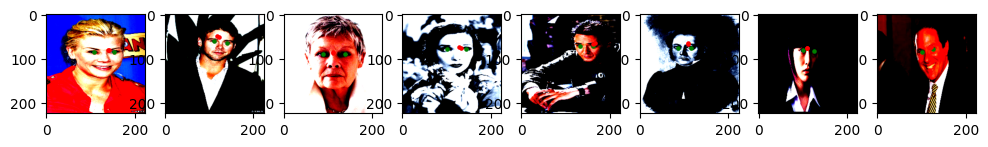

Epoch: 45, train loss = 0.0438, val loss: 0.0099,  train RMSE: 0.2093, val RMSE: 0.0994
lr before step: 0.000010, lr after = 0.000010


Train epoch: [46/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [46/50]:   0%|          | 0/7 [00:00<?, ?it/s]

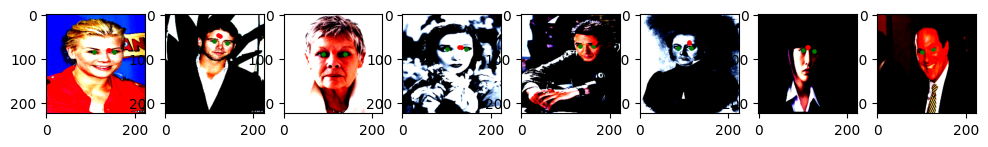

Epoch: 46, train loss = 0.0566, val loss: 0.0102,  train RMSE: 0.2380, val RMSE: 0.1009
lr before step: 0.000010, lr after = 0.000010


Train epoch: [47/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [47/50]:   0%|          | 0/7 [00:00<?, ?it/s]

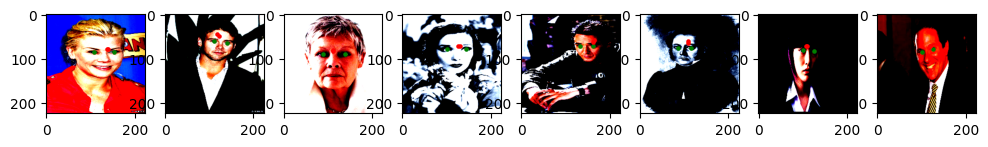

Epoch: 47, train loss = 0.0466, val loss: 0.0103,  train RMSE: 0.2160, val RMSE: 0.1014
lr before step: 0.000010, lr after = 0.000010


Train epoch: [48/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [48/50]:   0%|          | 0/7 [00:00<?, ?it/s]

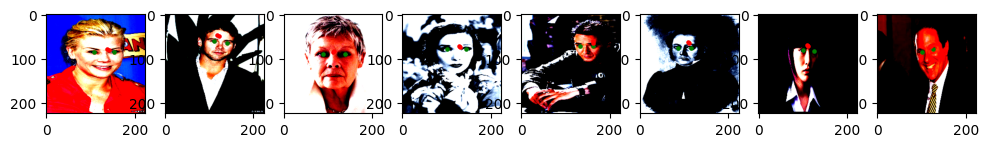

Epoch: 48, train loss = 0.0503, val loss: 0.0105,  train RMSE: 0.2244, val RMSE: 0.1027
lr before step: 0.000010, lr after = 0.000010


Train epoch: [49/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [49/50]:   0%|          | 0/7 [00:00<?, ?it/s]

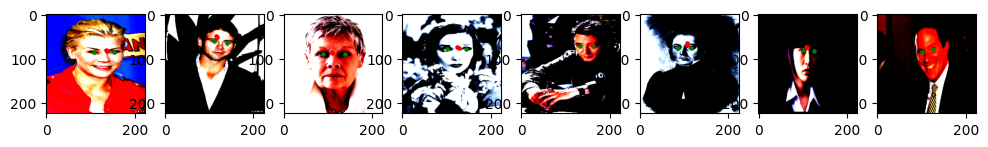

Epoch: 49, train loss = 0.0412, val loss: 0.0100,  train RMSE: 0.2031, val RMSE: 0.1001
lr before step: 0.000010, lr after = 0.000010


Train epoch: [50/50]:   0%|          | 0/26 [00:00<?, ?it/s]

Val epoch: [50/50]:   0%|          | 0/7 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c1b2e6a5a20>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():
  File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c1b2e6a5a20>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
Exception ignored in: Exception 

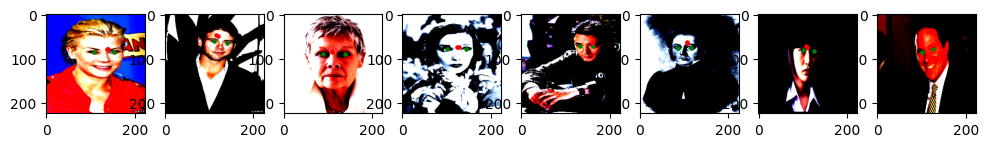

Epoch: 50, train loss = 0.0562, val loss: 0.0101,  train RMSE: 0.2371, val RMSE: 0.1006
lr before step: 0.000010, lr after = 0.000010


In [60]:
history = train(model, train_loader, val_loader, criterion, optimizer, 
    NUM_EPOCHS, scheduler, early_stopper, 'face_alignment.pt')

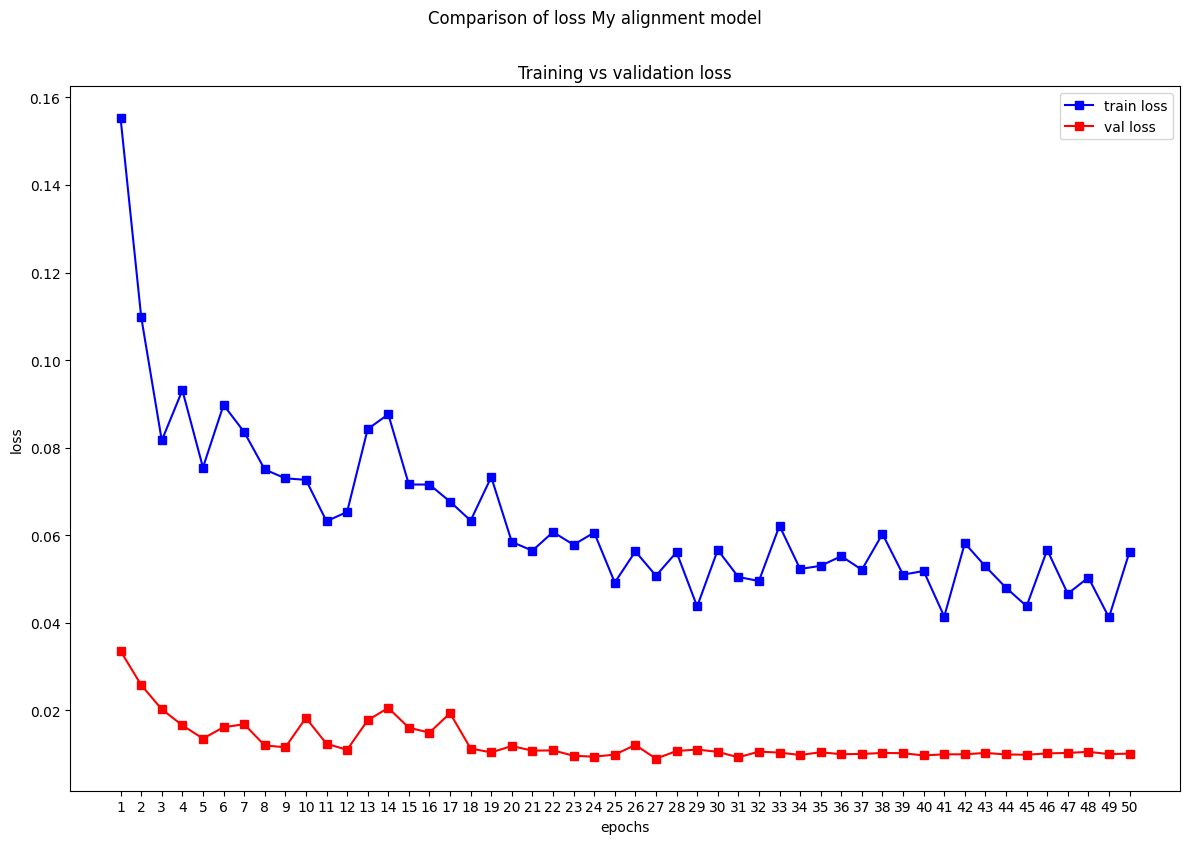

In [65]:
plot_results(history, 'My alignment model')
plt.savefig('loss_face_alignment.png')